### LAB 5

#### A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import IPython.display as ipd


In [5]:
 y,sr= librosa.load('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav')

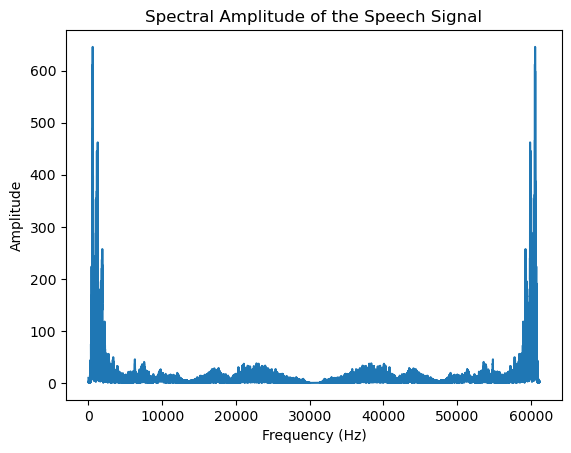

In [11]:

yf = np.fft.fft(y)
plt.plot(abs(yf))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Spectral Amplitude of the Speech Signal")
plt.show()



C:\Users\DHANALAKSHMI\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, ' original signal')

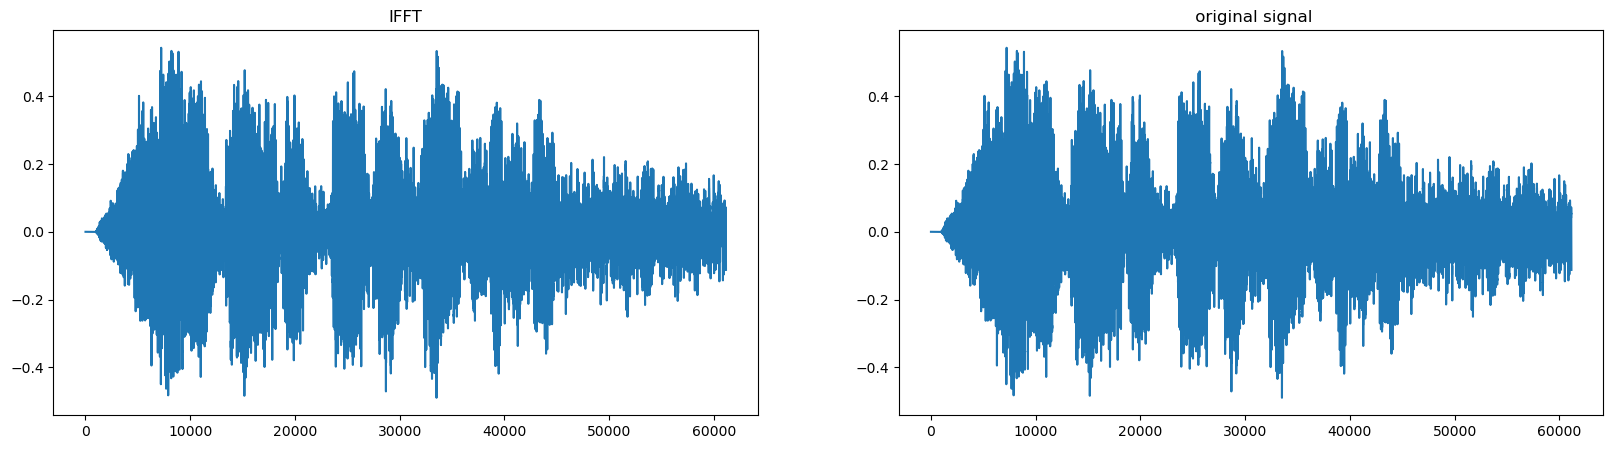

In [12]:
ifft_ = np.fft.ifft(yf)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ifft_)
plt.title('IFFT')
plt.subplot(1,2,2)
plt.plot(y)
plt.title(' original signal')

#### A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

In [17]:
import numpy as np
import librosa
import scipy.signal as signal
import scipy.fft as fft
import scipy.io.wavfile as wav

y, fs = librosa.load('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav')


In [19]:
spectrum = fft.fft(y)

In [20]:
n = len(spectrum)
freq = np.fft.fftfreq(n, 1/fs)

In [21]:
# Rectangular window function
def rectangular_window(freq, cutoff_low, cutoff_high):
    return np.where((np.abs(freq) >= cutoff_low) & (np.abs(freq) <= cutoff_high), 1, 0)


In [23]:

cutoff_low = 1000  # Define cutoff frequencies
cutoff_high = 4000
low_pass_filter = rectangular_window(freq, 0, cutoff_low)
band_pass_filter = rectangular_window(freq, cutoff_low, cutoff_high)
high_pass_filter = rectangular_window(freq, cutoff_high, fs/2)



In [24]:
# Apply filters to the spectrum
filtered_spectrum_low = spectrum * low_pass_filter
filtered_spectrum_band = spectrum * band_pass_filter
filtered_spectrum_high = spectrum * high_pass_filter

# Inverse transform the filtered spectra
filtered_audio_low = np.real(fft.ifft(filtered_spectrum_low))
filtered_audio_band = np.real(fft.ifft(filtered_spectrum_band))
filtered_audio_high = np.real(fft.ifft(filtered_spectrum_high))

# Save filtered audio signals
wav.write('filtered_audio_low.wav', fs, filtered_audio_low.astype(np.float32))
wav.write('filtered_audio_band.wav', fs, filtered_audio_band.astype(np.float32))
wav.write('filtered_audio_high.wav', fs, filtered_audio_high.astype(np.float32))


In [25]:
# Play filtered audio signals
filtered_audio_low, _ = librosa.load('filtered_audio_low.wav', sr=fs)
filtered_audio_band, _ = librosa.load('filtered_audio_band.wav', sr=fs)
filtered_audio_high, _ = librosa.load('filtered_audio_high.wav', sr=fs)

In [27]:
import IPython.display as ipd

# Define file paths for filtered audio files
filtered_audio_low_path = 'filtered_audio_low.wav'
filtered_audio_band_path = 'filtered_audio_band.wav'
filtered_audio_high_path = 'filtered_audio_high.wav'

# Play audio files
ipd.display(ipd.Audio(filtered_audio_low_path))
ipd.display(ipd.Audio(filtered_audio_band_path))
ipd.display(ipd.Audio(filtered_audio_high_path))


### COSINE

In [28]:
def cosine_window(freq, cutoff_low, cutoff_high):
    return np.cos(np.pi * (np.abs(freq) - cutoff_low) / (cutoff_high - cutoff_low)) * ((np.abs(freq) >= cutoff_low) & (np.abs(freq) <= cutoff_high))

In [29]:
cutoff_low = 1000  
cutoff_high = 4000
cosine_low_pass_filter = cosine_window(freq, 0, cutoff_low)
cosine_band_pass_filter = cosine_window(freq, cutoff_low, cutoff_high)
cosine_high_pass_filter = cosine_window(freq, cutoff_high, fs/2)

In [30]:
filtered_spectrum_cosine_low = spectrum * cosine_low_pass_filter
filtered_spectrum_cosine_band = spectrum * cosine_band_pass_filter
filtered_spectrum_cosine_high = spectrum * cosine_high_pass_filter

In [31]:
filtered_audio_cosine_low = np.real(fft.ifft(filtered_spectrum_cosine_low))
filtered_audio_cosine_band = np.real(fft.ifft(filtered_spectrum_cosine_band))
filtered_audio_cosine_high = np.real(fft.ifft(filtered_spectrum_cosine_high))

In [32]:
wav.write('filtered_audio_cosine_low.wav', fs, filtered_audio_cosine_low.astype(np.float32))
wav.write('filtered_audio_cosine_band.wav', fs, filtered_audio_cosine_band.astype(np.float32))
wav.write('filtered_audio_cosine_high.wav', fs, filtered_audio_cosine_high.astype(np.float32))


In [35]:
filtered_audio_cosine_low='filtered_audio_cosine_low.wav'
filtered_audio_cosine_band='filtered_audio_cosine_band.wav'
filtered_audio_cosine_high='filtered_audio_cosine_high.wav'

In [36]:
ipd.display(ipd.Audio(filtered_audio_cosine_low))
ipd.display(ipd.Audio(filtered_audio_band_path))
ipd.display(ipd.Audio(filtered_audio_high_path))

### GAUSSIAN

In [37]:
def gaussian_window(freq, cutoff, sigma):
    return np.exp(-0.5 * ((np.abs(freq) - cutoff) / sigma) ** 2)

In [38]:
gaussian_sigma = 500  
gaussian_low_pass_filter = gaussian_window(freq, cutoff_low, gaussian_sigma)
gaussian_band_pass_filter = gaussian_window(freq, (cutoff_high - cutoff_low) / 2, gaussian_sigma)
gaussian_high_pass_filter = gaussian_window(freq, cutoff_high, gaussian_sigma)

In [39]:
filtered_spectrum_gaussian_low = spectrum * gaussian_low_pass_filter
filtered_spectrum_gaussian_band = spectrum * gaussian_band_pass_filter
filtered_spectrum_gaussian_high = spectrum * gaussian_high_pass_filter

In [40]:
filtered_audio_gaussian_low = np.real(fft.ifft(filtered_spectrum_gaussian_low))
filtered_audio_gaussian_band = np.real(fft.ifft(filtered_spectrum_gaussian_band))
filtered_audio_gaussian_high = np.real(fft.ifft(filtered_spectrum_gaussian_high))

In [41]:
wav.write('filtered_audio_gaussian_low.wav', fs, filtered_audio_gaussian_low.astype(np.float32))
wav.write('filtered_audio_gaussian_band.wav', fs, filtered_audio_gaussian_band.astype(np.float32))
wav.write('filtered_audio_gaussian_high.wav', fs, filtered_audio_gaussian_high.astype(np.float32))

In [ ]:
filtered_audio_gaussian_low='filtered_audio_gaussian_low.wav'
filtered_audio_gaussian_band='filtered_audio_gaussian_band.wav'
filtered_audio_gaussian_high